In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import MACCSkeys
import numpy as np

In [2]:
mol1 = Chem.MolFromSmiles('COc1cc2c(cc1OCCCN3CCOCC3)c(ncn2)Nc4ccc(c(c4)Cl)F')

In [3]:
mol2 = Chem.MolFromSmiles('COCCOc1cc2c(cc1OCCOC)ncnc2Nc3cccc(c3)C#C')

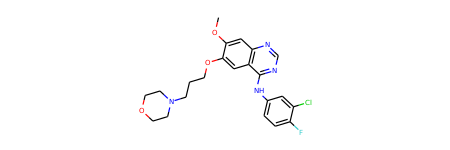

In [4]:
mol1

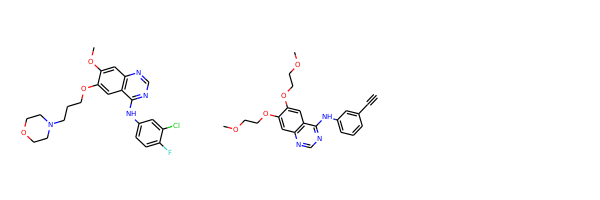

In [5]:
Draw.MolsToGridImage([mol1,mol2])

In [6]:
fp1 = MACCSkeys.GenMACCSKeys(mol1)
fp2 = MACCSkeys.GenMACCSKeys(mol2)

In [7]:
fp_a1 = np.array(map(int, fp1.ToBitString()))
fp_a2 = np.array(map(int, fp2.ToBitString()))

In [8]:
from scipy.spatial.distance import dice

In [9]:
dice(fp_a1, fp_a2)

0.18181818181818182

In [10]:
from rdkit.Chem.Draw import SimilarityMaps

In [11]:
%matplotlib inline

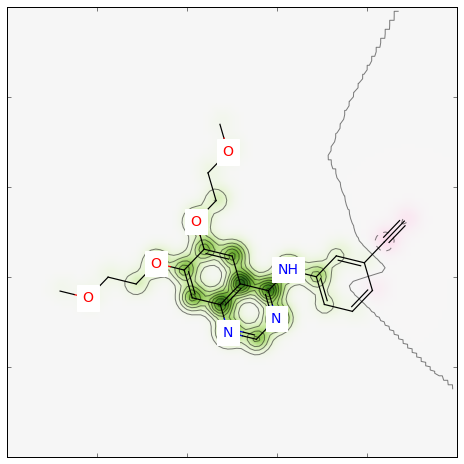

In [12]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(mol1, mol2, SimilarityMaps.GetMorganFingerprint)

In [13]:
from rdkit.Chem import PandasTools

In [14]:
import pandas as pd

In [17]:
df = PandasTools.LoadSDF('../data/test.sdf')

,ID,ROMol,logp,mw
0,DB01322,,2.6648,232.278994301

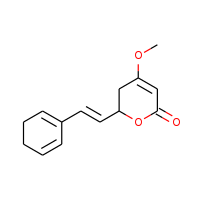

In [18]:
df.head(1)

In [19]:
from rdkit.Chem import Descriptors

In [20]:
df['HAC'] = df['ROMol'].map(Descriptors.HeavyAtomCount)

,ID,ROMol,logp,mw,HAC
0,DB01322,,2.6648,232.278994301,17

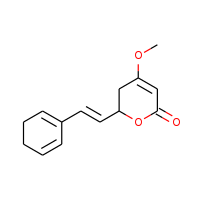

In [21]:
df.head(1)

In [22]:
df['HAC'] > 15

0      True
1      True
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12     True
13    False
14     True
15     True
16    False
17    False
18    False
19     True
20    False
21    False
22    False
23     True
24    False
25    False
26     True
27     True
28     True
29    False
30    False
31    False
32     True
33    False
34    False
35     True
36    False
37     True
38    False
39     True
40    False
41     True
42    False
43     True
44    False
45    False
46     True
47    False
48     True
49     True
50    False
51    False
52    False
53     True
54    False
55    False
56    False
57     True
58     True
59     True
60     True
61     True
62    False
63     True
64     True
65     True
66     True
67     True
68     True
69     True
70     True
71     True
72     True
73    False
74     True
75     True
76    False
77    False
78     True
79    False
80     True
81     True
82     True
83  

,ID,ROMol,logp,mw,HAC
35,DB01538,,2.2959,343.422991943,25
49,DB01569,,2.5852,344.450991653,25
61,DB01274,,2.2233,344.410992233,25
66,DB01295,,2.58422,345.438991943,25

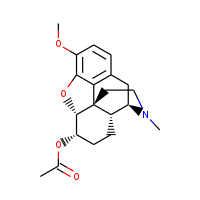
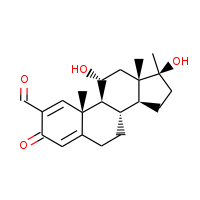
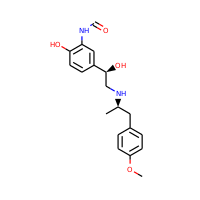
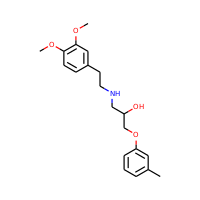

In [23]:
df[df['HAC'] >= 25]